In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

cani = pd.read_csv('cani.csv', sep = ';', decimal=",", parse_dates=True)

#Create una variabile che contenga le info sui cani morti e considerando solo i casi in cui MC e OndaEA non siano mancanti
app = cani[cani['MORTE'] == 1]
app2 = app.dropna(subset = ['MC']) 
caniM = app2.dropna(subset = ['OndaEA'])

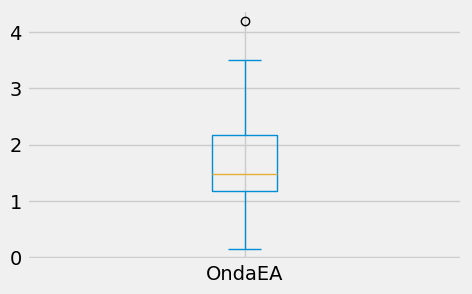

In [9]:
#3.2 Produrre il boxplot di OndaEA
caniM['OndaEA'].plot.box()
plt.show()

In [10]:
#3.3 Il grafico mostra un outlier. Determinare il valore di OndaEA per tale individuo.
caniM['OndaEA'].max()

4.19

In [12]:
#3.4 L'outlier è un cane morto per cause cardiache ?
caniM[caniM['OndaEA'] == 4.19].MC
print('Sì')

Sì


In [14]:
#3.5 Controllare che il terzo quantile, s, dell'ondaEA dei cani deceduti per cause cardiache è 1.41
s = cani[cani['MC'] == 0].OndaEA.quantile(.75)
s

1.41

In [15]:
#3.6 Cani morti per cause cardiache e per cause non cardiache
print(len(cani[cani['MC'] == 1]), len(cani[cani['MC'] == 0]))

87 28


In [33]:
'''
3.7 Nel dataset, quanti cani morti per cause cardiache avevano OndaEA >= s ?
Quanti avevano OndaEA < s ?
'''
print(len(cani[(cani['MC'] == 1) & (cani['OndaEA'] >= s)]), len(caniM[(caniM['MC'] == 1) & (caniM['OndaEA'] < s)]))

41 25


In [34]:
'''
3.8 Usiamo s come soglia di un classificatore binario che discrimina tra morte cardiaca e non cardiaca. 
Calcolare sensibilità e specificità di tale classificatore.
'''
VP = len(cani[(cani['MC'] == 1) & (cani['OndaEA'] >= s)])
FP = len(caniM[(caniM['MC'] == 1) & (caniM['OndaEA'] < s)])
VN = len(cani[(cani['MC'] == 0) & (cani['OndaEA'] < s)])
FN = len(cani[(cani['MC'] == 0) & (cani['OndaEA'] >= s)])

sensibilita = VP/(VP+FN)
specificita = VN/(VN+FP)
print('sensibilità:', sensibilita, 'specificità:', specificita)


sensibilità: 0.8913043478260869 specificità: 0.32432432432432434
